In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# Set modeling parameters
dx = 5  # [m]
dz = dx  # [m]
nx = 100  # [m]
nz = 100  # [m]

x = np.arange(0, nx*dx, dx)
z = np.arange(0, nz*dz, dz)

# Velocity model
vp = np.ones((nz, nx)) * 1500  # [m/s]

# TIME STEPPING
G = 12
fmax = np.min(vp) / (G*dx)
t_total = 1  # [sec] recording duration
dt = 0.002
nt = round(t_total/dt) + 1  # number of time steps
t = np.arange(0, nt) * dt

# Source
source = np.zeros(nt)
source[0] = 1

# Frequency
df = 1 / (2 * ((nt-1) * dt))
nf = round(fmax / df)
omega = np.zeros(nf, dtype=complex)  # angular frequency

source = np.fft.fft(source, 2*nf)

# Sources and Receivers positions
sx = 51
sz = 51
rx = 51  # receivers on some of grids
rz = 21  # receivers on some of grids

# FDFD modeling
u_freq = np.zeros((nx*nz, nf), dtype=complex)
matrix = np.zeros((nx*nz, nx*nz), dtype=complex)
Source_matrix = np.zeros(nx*nz)
Source_matrix[sz-1 + (sx-1)*nz] = 1.0

damp = np.log(100) / ((nt-1) * dt)
twrap = 0.001  # damping to suppress time aliasing

for ifreq in range(nf):
    print(f'Frequency= {ifreq+1}/{nf}')
    omega[ifreq] = complex(2 * np.pi * df * ifreq, damp)

    for ix in range(nx):
        for iz in range(nz):
            m = ix*nz + iz
            matrix[m, m] = (-omega[ifreq]**2 / vp[iz, ix]**2) + (2/dx**2) + (2/dz**2)
            if iz > 0: matrix[m, m-1] = -(1/dz**2)
            if iz < nz-1: matrix[m, m+1] = -(1/dz**2)
            if ix > 0: matrix[m, m-nz] = -(1/dx**2)
            if ix < nx-1: matrix[m, m+nz] = -(1/dx**2)

    # Adjust mass matrix
    Vp = vp.flatten()
    mass_matrix = ((4/dx**2) - (omega[ifreq] / Vp)**2)
    matrix = matrix - np.diag(np.diag(matrix)) + np.diag(mass_matrix)

    u_freq[:, ifreq] = spsolve(matrix, Source_matrix) * source[ifreq]

# Inverse frequency domain to time domain conversion
u_time = np.fft.ifft(u_freq, n=nt, axis=1).real

# Reshape u_time to a 3D array for plotting
u_time = u_time.reshape((nz, nx, nt))


Frequency= 1/50


C:\Users\USER\AppData\Local\Temp\ipykernel_109820\2976756308.py:70: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  u_freq[:, ifreq] = spsolve(matrix, Source_matrix) * source[ifreq]


Frequency= 2/50
Frequency= 3/50
Frequency= 4/50
Frequency= 5/50
Frequency= 6/50
Frequency= 7/50
Frequency= 8/50
Frequency= 9/50
Frequency= 10/50
Frequency= 11/50
Frequency= 12/50
Frequency= 13/50
Frequency= 14/50
Frequency= 15/50
Frequency= 16/50
Frequency= 17/50
Frequency= 18/50
Frequency= 19/50
Frequency= 20/50
Frequency= 21/50
Frequency= 22/50
Frequency= 23/50
Frequency= 24/50
Frequency= 25/50
Frequency= 26/50
Frequency= 27/50
Frequency= 28/50
Frequency= 29/50
Frequency= 30/50
Frequency= 31/50
Frequency= 32/50
Frequency= 33/50
Frequency= 34/50
Frequency= 35/50
Frequency= 36/50
Frequency= 37/50
Frequency= 38/50
Frequency= 39/50
Frequency= 40/50
Frequency= 41/50
Frequency= 42/50
Frequency= 43/50
Frequency= 44/50
Frequency= 45/50
Frequency= 46/50
Frequency= 47/50
Frequency= 48/50
Frequency= 49/50
Frequency= 50/50


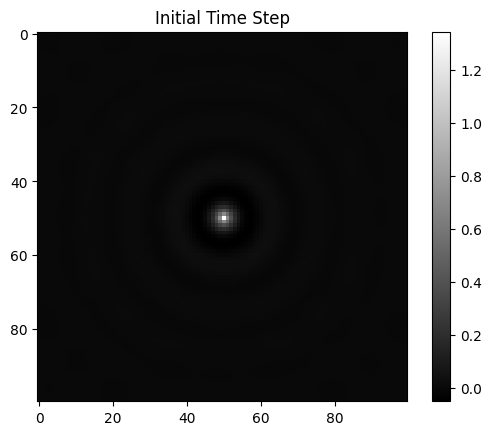

In [27]:

# Plotting
plt.figure()
plt.imshow(u_time[:, :, 0].real, cmap='gray')
plt.colorbar()
plt.title('Initial Time Step')
plt.show()


In [28]:
np.size(u_time[1,1,:])

501

In [29]:
nt

501

<function matplotlib.pyplot.show(close=None, block=None)>

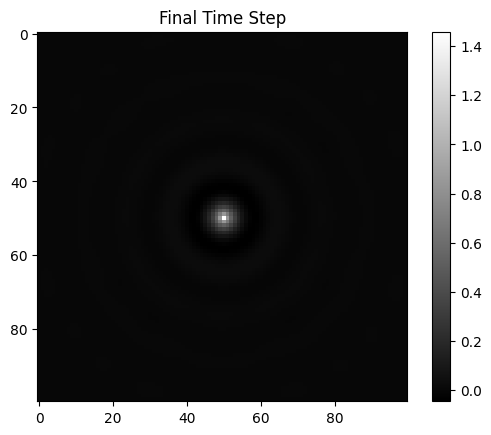

In [30]:

# Plotting2
plt.figure()
plt.imshow(u_time[:, :, nt-1].real, cmap='gray')
plt.colorbar()
plt.title('Final Time Step')
plt.show

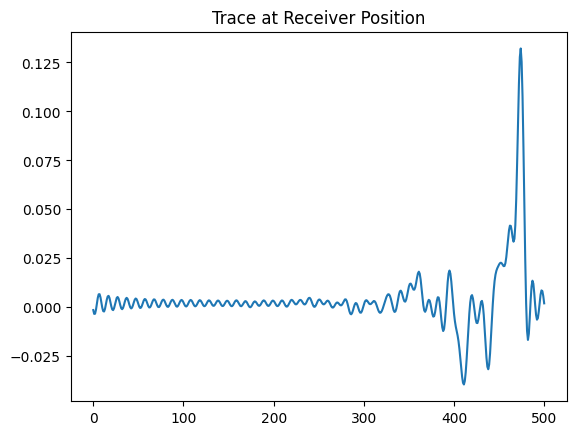

In [31]:

# Trace at receiver position
trace = u_time[rz-1, rx-1, :]
plt.figure()
plt.plot(trace)
plt.title('Trace at Receiver Position')
plt.show()

